In [1]:
import sys

In [2]:
import pandas

In [3]:
import datetime

In [4]:
import matplotlib

In [5]:
df=pandas.read_csv("study_centers_201909.csv")

In [6]:
df["weekday"]=df["device_local_date"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').weekday())

In [7]:
df["hour"]=df["device_local_date"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').hour)

In [8]:
shopping_center_ids=pandas.unique(df["shopping_center_id"])

In [9]:
shopping_center_ids[1]

'599cb959-11ef-49aa-9eb3-e6c17b4ea6ba'

In [10]:
df_by_center1_1=df.loc[(df['shopping_center_id']==shopping_center_ids[1])&(df["weekday"]==1)]

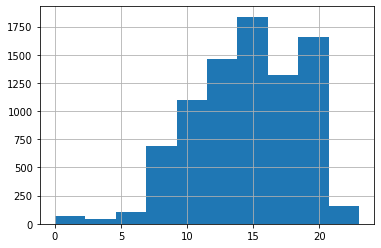

In [13]:
df_by_center1_1["hour"].hist()

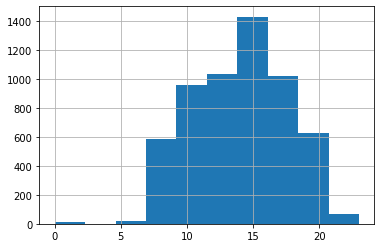

In [17]:
df.loc[(df['shopping_center_id']==shopping_center_ids[1])&(df["weekday"]==2)]["hour"].hist()